# Figure S1
- Selecting adhesome genes (intrinsic and associated components)
- Adhesome network and types of interactions

In [3]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import sparse
import scipy.stats as ss
import csv
import pandas as pd
import networkx as nx
import pickle
from collections import defaultdict
import operator
from scipy.sparse import csr_matrix
import itertools
import os.path
import math
import pybedtools
import gseapy
from gseapy.plot import barplot, dotplot
import OmicsIntegrator as oi

### Data directories

In [4]:
# Directory of adhesome data
dir_adhesome = '/home/louiscam/projects/gpcr/data/adhesome_data/'
# Saving directory
saving_dir = '/home/louiscam/projects/gpcr/save/figures/'
# Directory of TCR data
dir_tcr = '/home/louiscam/projects/gpcr/data/tcr_data/'

### Load TCR data
- https://www.wikipathways.org/index.php/Pathway:WP69
- http://www.netpath.org/netslim/tcr_pathway.html

In [6]:
# TCR data
tcr_df = pd.read_csv(dir_tcr+'TCR.csv', header=0, index_col=None)
print('Total number of TCR intrinsic and associated components = '+str(len(tcr_df)))
tcr_df['geneSymbol'].values

Total number of TCR intrinsic and associated components = 92


array(['AKT1', 'ATF2', 'BCL10', 'CARD11', 'CBL', 'CBLB', 'CCR5', 'CD247',
       'CD28', 'CD3D', 'CD3E', 'CD3G', 'CD4', 'CD83', 'CD8A', 'CDC42',
       'CHUK', 'CREB1', 'CRK', 'CRKL', 'DBNL', 'FAS', 'FOS', 'FYB', 'FYN',
       'GAB2', 'GATA3', 'GRAP2', 'GRB2', 'HRAS', 'ICOS', 'IKBKB', 'IKBKG',
       'IL15RA', 'IL17A', 'IL1A', 'IL1B', 'IL6', 'IL9', 'IRF4', 'ITK',
       'ITPR1', 'JUN', 'LAT', 'LCK', 'LCP2', 'MALT1', 'MAP2K1', 'MAP2K2',
       'MAP3K14', 'MAP3K7', 'MAP3K8', 'MAP4K1', 'MAPK14', 'MAPK1',
       'MAPK3', 'MAPK8', 'MAPK9', 'NCK1', 'NFATC1', 'NFATC2', 'NFKB1',
       'NFKBIA', 'OPRM1', 'PAK1', 'PDPK1', 'PIK3R1', 'PIK3R2', 'PLCG1',
       'PRKCD', 'PRKCQ', 'PSTPIP1', 'PTK2B', 'PTPN11', 'RAF1', 'REL',
       'RELA', 'RIPK2', 'SH2B3', 'SHC1', 'SKAP1', 'SOS1', 'TGFB1',
       'TNFRSF9', 'TRA', 'TRAF6', 'TRB', 'VAV1', 'VAV3', 'VIM', 'WAS',
       'ZAP70'], dtype=object)

### GSEA

In [8]:
# GSEA of TCR genes
enr = gseapy.enrichr(gene_list=list(tcr_df['geneSymbol'].values), 
                     gene_sets='GO_Biological_Process_2018', organism='Human',
                     description='TCR_genes', outdir='gsea_tcr',format='png',
                     verbose=False)
print(len(enr.results))

1369


In [9]:
# Visualize results
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,Fc-epsilon receptor signaling pathway (GO:0038...,36/182,2.648943e-50,1.500734e-47,0,0,87.014677,9933.168639,ITK;SHC1;PIK3R2;PIK3R1;BCL10;RELA;MALT1;IKBKB;...
1,GO_Biological_Process_2018,T cell receptor signaling pathway (GO:0050852),35/163,3.219775e-50,1.500734e-47,0,0,94.887610,10813.386599,ITK;TRB;WAS;CD3G;PIK3R2;PIK3R1;BCL10;GATA3;CD3...
2,GO_Biological_Process_2018,Fc receptor signaling pathway (GO:0038093),36/183,3.288679e-50,1.500734e-47,0,0,86.418367,9846.402364,ITK;SHC1;PIK3R2;PIK3R1;BCL10;RELA;MALT1;IKBKB;...
3,GO_Biological_Process_2018,antigen receptor-mediated signaling pathway (G...,37/257,2.838599e-46,9.715106e-44,0,0,60.202975,6313.823360,ITK;TRB;WAS;CD3G;PIK3R2;PIK3R1;BCL10;GATA3;CD3...
4,GO_Biological_Process_2018,cytokine-mediated signaling pathway (GO:0019221),43/633,6.386086e-40,1.748510e-37,0,0,28.733103,2593.141895,SHC1;PIK3R1;GATA3;CBL;RELA;CRKL;CDC42;IKBKB;AK...


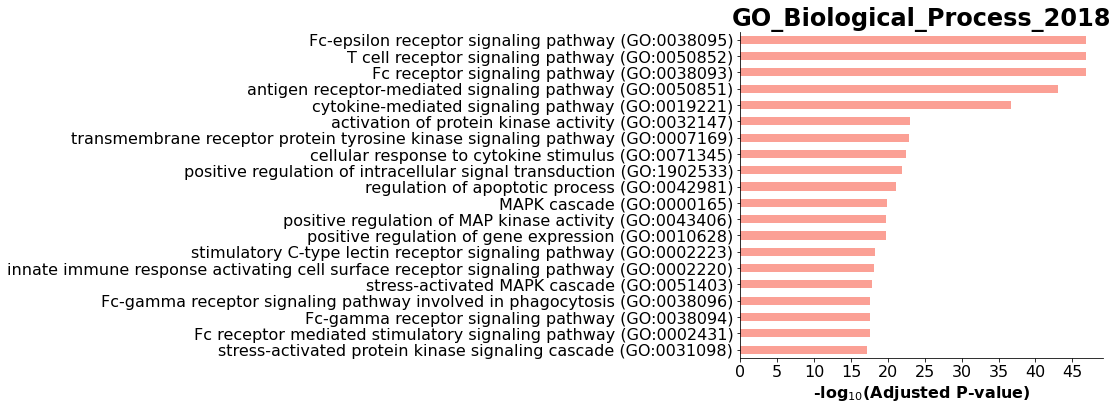

In [10]:
# Barplot
barplot(enr.res2d, column='Adjusted P-value', title='GO_Biological_Process_2018',
        cutoff=0.01, top_term=20, figsize=(6.5, 6), color='salmon', ofname=None)